# Day 8 — Data Augmentation in CNNs
We improve generalization by applying random transformations to CIFAR-10 images.

## Step 1: Load Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers #type:ignore
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

## Step 2: Define Augmentation Pipeline

In [2]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

## Step 3: Visualize Augmented Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0301155..1.0210253].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.02283983..1.0044823].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.020979747..1.0024306].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.016042218..1.0273824].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.019669741..1.0043836].


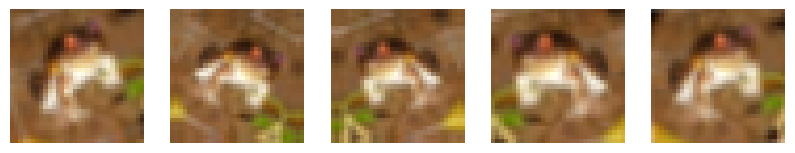

In [3]:
plt.figure(figsize=(10, 5))
for i in range(5):
    augmented = data_augmentation(x_train[:1])
    plt.subplot(1, 5, i+1)
    plt.imshow(augmented[0])
    plt.axis("off")
plt.show()


## Step 4: CNN with Data Augmentation

In [4]:
model = keras.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test))

d:\40-Days-DL-MLOps\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.3531 - loss: 1.7614 - val_accuracy: 0.4881 - val_loss: 1.4067
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.4541 - loss: 1.5158 - val_accuracy: 0.5462 - val_loss: 1.2635
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.4909 - loss: 1.4162 - val_accuracy: 0.5692 - val_loss: 1.1971
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.5185 - loss: 1.3577 - val_accuracy: 0.5953 - val_loss: 1.1429
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.5365 - loss: 1.3094 - val_accuracy: 0.6087 - val_loss: 1.1037
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 37ms/step - accuracy: 0.5488 - loss: 1.2783 - val_accuracy: 0.5971 - val_loss: 1.1573
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5583 - loss: 1.2519 - val_accuracy: 0.6103 - val_loss: 1.1132
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.5661 - loss: 1.2331 - 

## Step 5: Evaluate Model

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Final Test Accuracy:", test_acc)

Final Test Accuracy: 0.646399974822998
